In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
response = requests.get("https://www.stocklore.ai/api/nse_data.csv?q=TCS")
response.status_code

200

In [305]:
a = response.content.decode("utf-8").split("\n")
a = [i.split(",") for i in a]

In [306]:
a

[['Date', 'Open', 'Close', 'High', 'Low', 'Volume'],
 ['2008-01-01', '1077.0', '1054.55', '1077.0', '1052.0', '232097'],
 ['2008-01-02', '1060.0', '1050.0', '1061.0', '1031.5', '716231'],
 ['2008-01-03', '1030.1', '1011.05', '1045.0', '1005.35', '1292070'],
 ['2008-01-04', '1011.05', '1005.2', '1022.9', '1002.3', '579717'],
 ['2008-01-07', '1000.0', '975.6', '1008.8', '972.5', '911836'],
 ['2008-01-08', '980.0', '987.85', '992.0', '969.3', '801933'],
 ['2008-01-09', '994.8', '996.3', '1006.0', '989.9', '612532'],
 ['2008-01-10', '998.0', '981.65', '1009.5', '962.0', '835594'],
 ['2008-01-11', '915.35', '989.75', '1004.0', '915.35', '537297'],
 ['2008-01-14', '999.8', '961.15', '999.8', '955.6', '1039716'],
 ['2008-01-15', '965.0', '940.0', '968.0', '934.0', '733897'],
 ['2008-01-16', '940.0', '944.95', '966.7', '925.0', '782989'],
 ['2008-01-17', '965.8', '922.7', '966.0', '919.0', '1575524'],
 ['2008-01-18', '929.5', '903.2', '940.0', '897.1', '1083454'],
 ['2008-01-21', '904.0', '831

In [310]:
price_df = pd.DataFrame(a[1:-1], columns=a[0])
price_df.iloc[:,1:] = price_df.iloc[:,1:].astype('float')
price_df.head()

,Date,Open,Close,High,Low,Volume
0,2008-01-01,1077,1054.55,1077,1052,232097
1,2008-01-02,1060,1050,1061,1031.5,716231
2,2008-01-03,1030.1,1011.05,1045,1005.35,1.29207e+06
3,2008-01-04,1011.05,1005.2,1022.9,1002.3,579717
4,2008-01-07,1000,975.6,1008.8,972.5,911836


In [311]:
type(price_df['Open'][0])

float

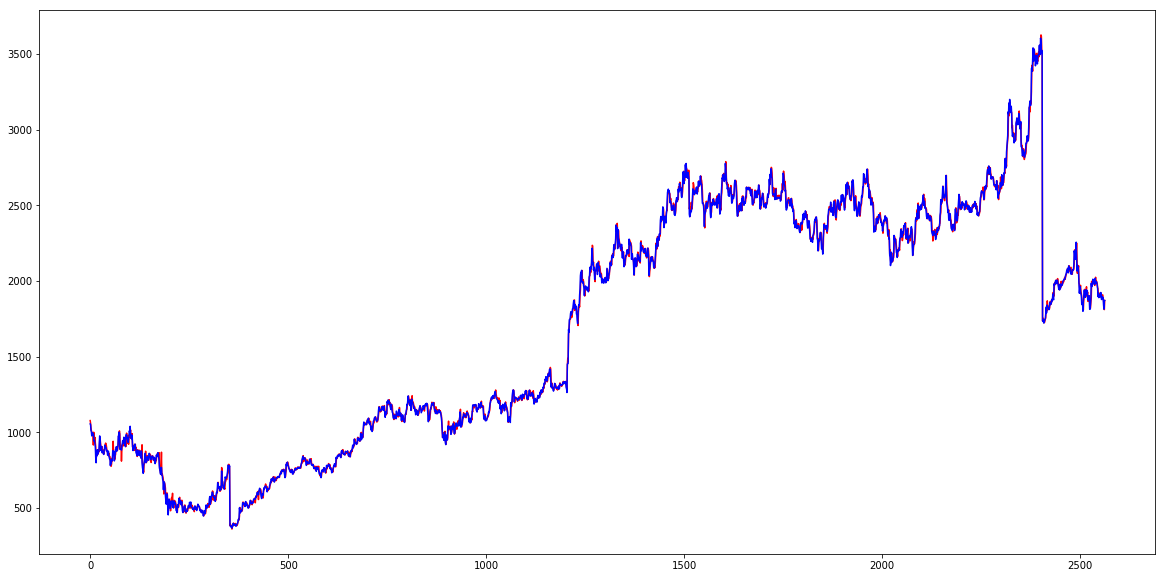

In [313]:
temp_df = price_df.copy()
plt.figure(1, figsize=(20,10))
plt.plot(temp_df['Open'].values, 'r-')
plt.plot(temp_df['Close'].values, 'b-')

In [314]:
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%Y-%m-%d')

In [315]:
path = Path('../Split and bonus data/moneycontrol.com_scrape')
split_df = pd.read_csv(path/"stocks_split_data.csv")
bonus_df = pd.read_csv(path/"bonus_issue_data.csv")

In [316]:
split_df.head()

,Company,OldFV,NewFV,SplitDate
0,Tata Steel,100,10,23-10-1989
1,Reliance Infra,100,10,19-10-1989
2,Greaves Cotton,100,10,25-07-1990
3,Greaves Cotton,100,10,25-07-1990
4,Tayo Rolls,100,10,28-05-1990


In [317]:
bonus_df.head()

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus
0,Premier,1:1,12-01-1987,-,09-12-1986
1,Bosch,1:1,03-09-1986,-,26-09-1986
2,SPIC,1:1,11-09-1986,-,17-06-1986
3,Harrisons Malay,2:5,27-01-1988,-,04-12-1987
4,Futura,1:2,23-08-1986,-,20-11-1987


In [318]:
split_tcs = split_df[split_df['Company']=='TCS']
split_tcs

,Company,OldFV,NewFV,SplitDate


In [319]:
bonus_tcs = bonus_df[bonus_df['Company']=='TCS'].reset_index(drop=True)
bonus_tcs

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus
0,TCS,1:1,17-04-2006,31-07-2006,28-07-2006
1,TCS,1:1,20-04-2009,17-06-2009,16-06-2009
2,TCS,1:1,19-04-2018,02-06-2018,31-05-2018


In [320]:
b = price_df[(price_df['Date']>'2009-06-10')&(price_df['Date']<'2009-06-20')]
b

,Date,Open,Close,High,Low,Volume
350,2009-06-11,788,775.1,792.45,770,970800
351,2009-06-12,785,764.55,794.8,761.2,1.58966e+06
352,2009-06-15,764.7,778,785,755,1.64897e+06
353,2009-06-16,383.3,389.15,393.5,371.2,2.172e+06
354,2009-06-17,392,378.75,395,375,1.87078e+06
355,2009-06-18,378,376.4,393,372.05,2.37655e+06
356,2009-06-19,377,379.8,392,375,3.86387e+06


In [321]:
b = price_df[(price_df['Date']>'2018-05-25')&(price_df['Date']<'2018-06-05')]
b

,Date,Open,Close,High,Low,Volume
2402,2018-05-28,3616.5,3502.05,3616.5,3486,1.8584e+06
2403,2018-05-29,3529.9,3523.5,3544,3488,1.76266e+06
2404,2018-05-30,3509.05,3514.1,3533,3482.5,1.88955e+06
2405,2018-05-31,1734,1741.05,1759.05,1726.1,5.04937e+06
2406,2018-06-01,1754,1732.45,1757.5,1716.3,1.60386e+06
2407,2018-06-04,1745,1744.25,1749,1712.6,1.68148e+06


In [322]:
bonus_tcs['Ex-Bonus'] = pd.to_datetime(bonus_tcs['Ex-Bonus'], format='%d-%m-%Y')

In [323]:
bonus_tcs = bonus_tcs[bonus_tcs['Ex-Bonus']>'01-01-2008'].reset_index(drop=True)
bonus_tcs

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus
0,TCS,1:1,20-04-2009,17-06-2009,2009-06-16
1,TCS,1:1,19-04-2018,02-06-2018,2018-05-31


In [324]:
bonus_tcs['Factor'] = [int(i[0])+int(i[2]) for i in bonus_tcs['Ratio']]
bonus_tcs

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus,Factor
0,TCS,1:1,20-04-2009,17-06-2009,2009-06-16,2
1,TCS,1:1,19-04-2018,02-06-2018,2018-05-31,2


In [325]:
for i in range(len(bonus_tcs)):
    price_df.loc[price_df['Date']<bonus_tcs['Ex-Bonus'][i],['Open','Close','High','Low']] /= bonus_tcs['Factor'][i]

In [326]:
b = price_df[(price_df['Date']>'2009-06-10')&(price_df['Date']<'2009-06-20')]
b

,Date,Open,Close,High,Low,Volume
350,2009-06-11,197,193.775,198.113,192.5,970800
351,2009-06-12,196.25,191.137,198.7,190.3,1.58966e+06
352,2009-06-15,191.175,194.5,196.25,188.75,1.64897e+06
353,2009-06-16,191.65,194.575,196.75,185.6,2.172e+06
354,2009-06-17,196,189.375,197.5,187.5,1.87078e+06
355,2009-06-18,189,188.2,196.5,186.025,2.37655e+06
356,2009-06-19,188.5,189.9,196,187.5,3.86387e+06


In [327]:
b = price_df[(price_df['Date']>'2018-05-25')&(price_df['Date']<'2018-06-05')]
b

,Date,Open,Close,High,Low,Volume
2402,2018-05-28,1808.25,1751.03,1808.25,1743,1.8584e+06
2403,2018-05-29,1764.95,1761.75,1772,1744,1.76266e+06
2404,2018-05-30,1754.53,1757.05,1766.5,1741.25,1.88955e+06
2405,2018-05-31,1734,1741.05,1759.05,1726.1,5.04937e+06
2406,2018-06-01,1754,1732.45,1757.5,1716.3,1.60386e+06
2407,2018-06-04,1745,1744.25,1749,1712.6,1.68148e+06


In [328]:
price_df

,Date,Open,Close,High,Low,Volume
0,2008-01-01,269.25,263.637,269.25,263,232097
1,2008-01-02,265,262.5,265.25,257.875,716231
2,2008-01-03,257.525,252.762,261.25,251.338,1.29207e+06
3,2008-01-04,252.762,251.3,255.725,250.575,579717
4,2008-01-07,250,243.9,252.2,243.125,911836
5,2008-01-08,245,246.963,248,242.325,801933
6,2008-01-09,248.7,249.075,251.5,247.475,612532
7,2008-01-10,249.5,245.412,252.375,240.5,835594
8,2008-01-11,228.838,247.438,251,228.838,537297
9,2008-01-14,249.95,240.287,249.95,238.9,1.03972e+06


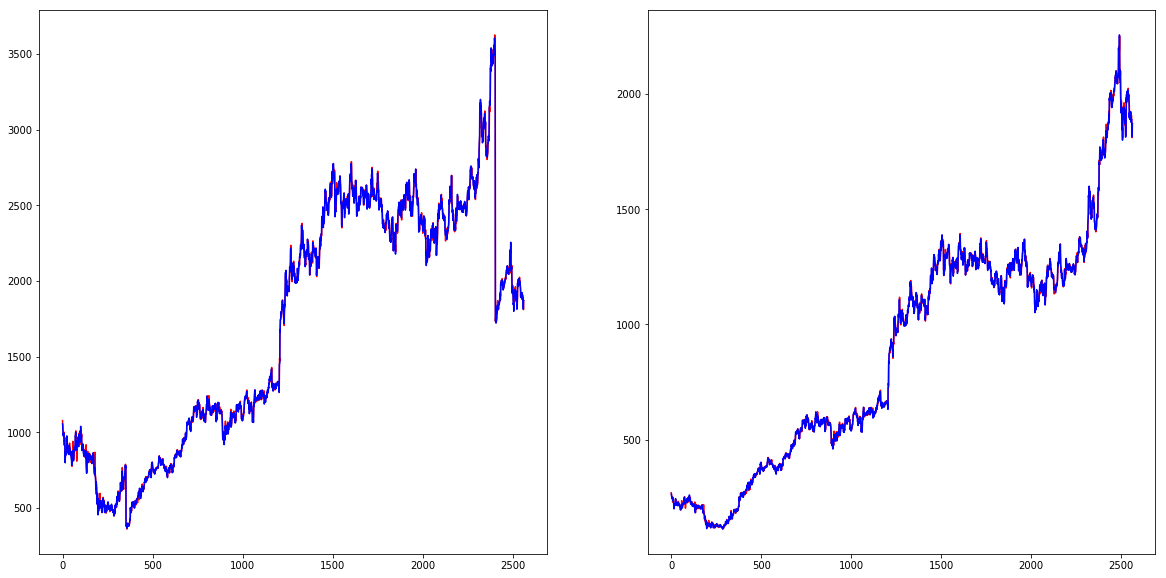

In [329]:
plt.figure(1, figsize=(20,10))
plt.subplot(121)
plt.plot(temp_df['Open'].values, 'r-')
plt.plot(temp_df['Close'].values, 'b-')

plt.subplot(122)
plt.plot(price_df['Open'].values, 'r-')
plt.plot(price_df['Close'].values, 'b-')